<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h3><center>Andrey Shestakov (<a href="mailto:avshestakov@hse.ru">avshestakov@hse.ru</a>)</center></h3>
<hr>
<h2><center>Support Vector Machine. Kernel Trick<sup><a href="#fn1" id="ref1">1</a></sup></center></h2>



<sup id="fn1">1. Some materials are taken from <a href="http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2_%28%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9%2C_%D0%92.%D0%92.%D0%9A%D0%B8%D1%82%D0%BE%D0%B2%29">machine learning course of Victor Kitov</a></sup>

In [1]:
%matplotlib inline


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

from ipywidgets import interact, IntSlider, fixed, FloatSlider
    
import warnings
warnings.filterwarnings('ignore')

# Let's recall previous lecture

* Various quality measures for regression and classification
    * Like...

# Aaand linear classification

<center><img src='img/lin_class.png' width=500></center>

**General idea of SVM:** select hyperplane that maximizes the spread between classes

## Linearly separable case
## Linearly non-separable case

# Linearly separable case

## Recap of linear classification

Discriminant function $$g(x) = w_0 + w_1x_1 + w_2x_2 = w_0 + \langle w, x \rangle = w_0 +  w^\top x $$

* If $g(x^*) > 0$, then $y^* = \text{'black'} = +1$
* If $g(x^*) < 0$, then $y^* = \text{'white'} = -1$


* $\frac{|g(x)|}{||w||}$ - distance from point $x$ to hyperplane


## Problem statement

* For all objects:
    * $w_0 + \langle w, x_i \rangle \geq b$, if $y_i = + 1$
    * $w_0 + \langle w, x_i \rangle \leq - b$, if $y_i = - 1$
* Notice, that $g(x) = w_0 + \langle w, x \rangle$ and $g'(x) = c \cdot (w_0 + \langle w, x \rangle)$, $\forall c>0$ describe the same hyperplane
* Lets set $c$ such that $\min\limits_i M_i = \min\limits_i y \cdot g(x_i) = 1$
<center><img src='./img/margin.png'></center>
* That means that:
    * $w_0 + \langle w, x_i \rangle \geq 1$, if $y_i = + 1$
    * $w_0 + \langle w, x_i \rangle \leq - 1$, if $y_i = - 1$

## Problem statement
<center><img src='./img/margin.png'></center>

* "Street" between classes:  $ -1 \leq w_0 + \langle w, x \rangle \leq +1$
* "Street" width:
 $$\langle (x_{+} -  x_{-}) , \frac{w}{||w||}\rangle = \frac{\langle w, x_{+} \rangle - \langle w, x_{-} \rangle }{||w||} = \frac{2}{||w||}  \rightarrow \max$$
 
 
* Problem statement:
$$
\begin{cases} 
   \frac{1}{2} ||w||^2  \rightarrow \min  \\
   y_i(\langle w, x_i \rangle + w_0 ) \geq 1 \quad i=1\dots n
\end{cases}
$$

## Problem statement: dual problem

* Initial statement:
$$
\begin{cases} 
   \frac{1}{2} ||w||^2  \rightarrow \min  \\
   y_i(\langle w, x_i \rangle + w_0 ) \geq 1 \quad i=1\dots n
\end{cases}
$$

By Karush-Kuhn-Takker:


$$\begin{cases} 
   \mathcal{L}(w,w_0,\lambda) = \frac{1}{2} ||w||^2  - \sum\limits_i \lambda_i \left( y_i(\langle w, x \rangle + w_0 )  - 1\right)  \rightarrow \min\limits_{w,w_0}\max\limits_{\lambda}  \\
   \lambda_i \geq 0 \quad i=1\dots n\\
   \lambda_i = 0 \text{, or }  y_{i}(\langle w, x_i \rangle + w_0)=1 \quad i=1\dots n
\end{cases}$$


## Support vectors

**non-informative observations:** $y_{i}(\langle w, x_i \rangle + w_0)>1$ (or $\lambda_i = 0$)
* do not affect the solution

**support vectors:** $y_{i}(x_{i}^{T}w+w_{0})=1$ (or $\lambda_i > 0$)
* lie at distance $1/\|w\|$ to separating hyperplane 
* affect the the solution.
<center><img src='img/svm-linsep.png'></center>


## Problem statement: dual problem

Necessary condition:
*  $\frac{\partial \mathcal{L} }{\partial w} = w - \sum\limits_i \lambda_iy_ix_i = 0 \quad \Rightarrow  \quad w = \sum\limits_i \lambda_iy_ix_i$
*  $\frac{\partial \mathcal{L} }{\partial w_0} = \sum\limits_i \lambda_iy_i = 0$

$$\begin{cases}
\mathcal{L}(\lambda) = \sum\limits_i\lambda_i  - \frac{1}{2} \sum\limits_i\sum\limits_j \lambda_i \lambda_j  y_i y_j (\langle x_i, x_j \rangle)  \rightarrow \max\limits_\lambda  \\
\lambda_i \geq 0 \quad i=1\dots n \\
\sum\limits_i \lambda_iy_i = 0
\end{cases}$$

* **Depends on dot product of features, not features themselves**
* $\mathcal{L}(\lambda)$ - convex
* Have a unique solution
* Once $\lambda_i$ are found: $w = \sum\limits_i \lambda_iy_ix_i$
* $w_0$ can be found as mean or median of $\{\langle w, x_i \rangle - y_i: \lambda_i \neq 0\}$

In [9]:
from sklearn.datasets.samples_generator import make_classification

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

def plot_svc_log_decision_function(clf1, clf2, ax=None):
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    XX, YY = np.meshgrid(x, y)
    XY = np.c_[XX.ravel(), YY.ravel()]
    P1 = clf1.decision_function(XY)
    P1 = P1.reshape(XX.shape)
    
    P2 = clf2.decision_function(XY)
    P2 = P2.reshape(XX.shape)
    # plot the margins
    cplot = ax.contour(XX, YY, P1, colors='k', label='svm',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.clabel(cplot, inline=1, fontsize=10)
    
    ax.contour(XX, YY, P2, colors='r', label='logreg',
               levels=[0], alpha=0.5,
               linestyles=['-'])

    
def plot_svc_decision_function(clf1, ax=None):
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    XX, YY = np.meshgrid(x, y)
    XY = np.c_[XX.ravel(), YY.ravel()]
    P1 = clf1.decision_function(XY)
    P1 = P1.reshape(XX.shape)
    
    # plot the margins
    cplot = ax.contour(XX, YY, P1, colors='k', label='svm',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.clabel(cplot, inline=1, fontsize=10)
    

def lin_sep_svm_demo(class_sep=2):
    X, y = make_classification(n_samples=100, n_features=2, n_informative=2, class_sep=class_sep, scale=1,
                                n_redundant=0, n_clusters_per_class=1, random_state=31)
    # x_line = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5)

    lin_svm = SVC(kernel='linear', C=100).fit(X, y)
    
    log_reg = LogisticRegression(C=100).fit(X, y)
    
    plt.figure(figsize=(10,7))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='flag')
    plot_svc_log_decision_function(lin_svm, log_reg)
    # plt.scatter(lin_svm.support_vectors_[:, 0], lin_svm.support_vectors_[:, 1],
    #        s=200, facecolors='none')
    
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
    plt.xlim(-2, 5)
    plt.ylim(-3, 4)

In [10]:
interact(lin_sep_svm_demo, class_sep=FloatSlider(min=0.4, max=4, step=0.1, value=2))

interactive(children=(FloatSlider(value=2.0, description='class_sep', max=4.0, min=0.4), Output()), _dom_class…

<function __main__.lin_sep_svm_demo>

# Linearly non-separable case

## Linearly non-separable case

* Previous constraints become incomplatible!
* Allow objects to get inside the street:
    * Instead of $y_i(\langle w, x_i \rangle + w_0 ) \geq 1$
    * Put $y_i(\langle w, x_i \rangle + w_0 ) \geq 1 - \xi_i, \quad \xi_i \geq 0$

<center><img src='./img/slack.png'></center>

And maximize: 

$$ \frac{1}{2} ||w||^2 + C\sum\limits_i\xi_i  \rightarrow \min\limits_{w,w_0,\xi}  $$

## Linearly non-separable case

That brings us to the following optimization task:
$$
\begin{cases} 
   \frac{1}{2} ||w||^2 + C\sum\limits_i\xi_i  \rightarrow \min\limits_{w,w_0,\xi} \\
   y_i(\langle w, x_i \rangle + w_0 ) \geq 1 - \xi_i \quad i=1\dots n \\
   \xi_i \geq 0 \quad i=1\dots n
\end{cases}
$$

* $C$ - is hyperparameter of missclassification cost

## Linearly non-separable case: dual problem

With the same procedures we have the following dual problem
$$\begin{cases}
\mathcal{L}(\lambda) = \sum\limits_i\lambda_i  - \frac{1}{2} \sum\limits_i\sum\limits_j \lambda_i \lambda_j  y_i y_j (\langle x_i, x_j \rangle)  \rightarrow \max\limits_\lambda  \\
0 \leq \lambda_i \leq C \quad i=1\dots n \\
\sum\limits_i \lambda_iy_i = 0
\end{cases}$$

In [13]:
def lin_sep_svm_demo_C(class_sep=2, C=10):
    X, y = make_classification(n_samples=100, n_features=2, n_informative=2, class_sep=class_sep, scale=1,
                                n_redundant=0, n_clusters_per_class=1, random_state=31)
    # x_line = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5)

    lin_svm = SVC(kernel='linear', C=C).fit(X, y)
    
    log_reg = LogisticRegression(C=C).fit(X, y)
    
    plt.figure(figsize=(10,7))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='flag')
    plot_svc_log_decision_function(lin_svm, log_reg)
    plt.scatter(lin_svm.support_vectors_[:, 0], lin_svm.support_vectors_[:, 1],
            s=200, facecolors='none')
    
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
    plt.xlim(-2, 5)
    plt.ylim(-3, 4)

In [14]:
interact(lin_sep_svm_demo_C, class_sep=FloatSlider(min=0.2, max=4, value=2, step=0.2), C=FloatSlider(min=0.002, max=10, step=0.002, value=1))

interactive(children=(FloatSlider(value=2.0, description='class_sep', max=4.0, min=0.2, step=0.2), FloatSlider…

<function __main__.lin_sep_svm_demo_C>

## Another view on SVM

Problem
$$
\begin{cases} 
   \frac{1}{2} ||w||^2 + C\sum\limits_i\xi_i  \rightarrow \min\limits_{w,w_0,\xi} \\
   y_i(\langle w, x_i \rangle + w_0 ) \geq 1 - \xi_i \quad i=1\dots n \\
   \xi_i \geq 0 \quad i=1\dots n
\end{cases}
$$
can be rewritten as
$$ \frac{1}{2С} ||w||^2 + \sum\limits_i\max(0,1-M_i) \rightarrow \min\limits_{w,w_0}, $$
where $M_i$ - is margin of object $x_i$

<center><img src='img/svm-lossfunc.png' width=400></center>


# Kernel Trick

<center><img src='img/interstellar.jpg' width='600'></center>

In [17]:
from sklearn.datasets.samples_generator import make_circles
from mpl_toolkits import mplot3d

def demo_nonlin_data():
    X, y = make_circles(n_samples=100, factor=0.1, 
                        noise=0.1, random_state=0)

    fig = plt.figure()
    ax = fig.add_subplot(1, 2, 1)

    ax.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='flag')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    
    r = X[:, 0] ** 2 + X[:, 1] ** 2
    
    ax = fig.add_subplot(1, 2, 2)
    
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=70, cmap='flag')
    ax.view_init(elev=30, azim=30)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$x_1^2 + x_2^2$')

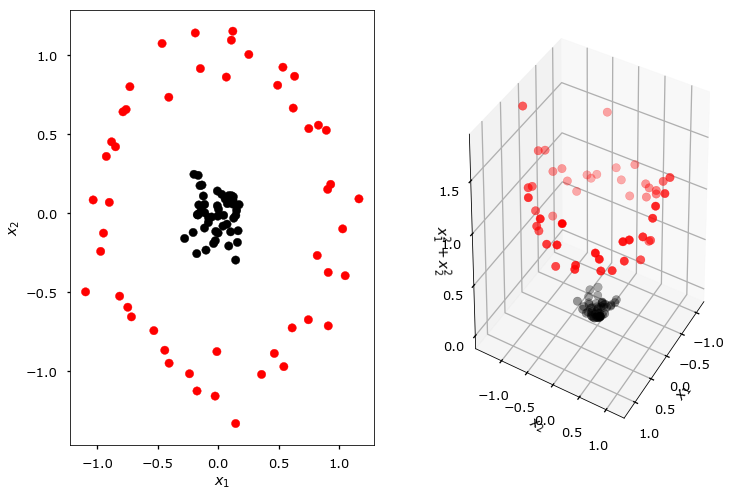

In [18]:
demo_nonlin_data() 

## Transformation to linear separable domain
* $\phi: X \rightarrow H$
* $H$ - higher dimentional space in which classes become linearly separable
* Discrimenant function in $H$ is linear, but its projection on $X$ is not linear

## Kernel Trick

* Imagine we try to fit SVM в $H$
$$\begin{cases}
\mathcal{L}(\lambda) = \sum\limits_i\lambda_i  - \frac{1}{2} \sum\limits_i\sum\limits_j \lambda_i \lambda_j  y_i y_j (\langle \phi(x_i), \phi(x_j) \rangle)  \rightarrow \max\limits_\lambda  \\
0 \leq \lambda_i \leq C \quad i=1\dots n \\
\sum\limits_i \lambda_iy_i = 0
\end{cases}$$
* No need to explicitly define $\phi$, only scalar product required!
* Kernel trick!
* $K(x_i, x_j) = \langle \phi(x_i), \phi(x_j) \rangle$ - kernel


**Discriminant function:**
* Without kernel $g(x) = w^\top x + w_0, \quad w = \sum\limits_{i:\lambda_i>0} \lambda_iy_ix_i$
* With kernel $g(x) = \sum\limits_{i:\lambda_i>0} \lambda_iy_i\langle x_i, x \rangle + w_0 = \sum\limits_{i:\lambda_i>0} \lambda_iy_i K(x_i, x) + w_0$

## Kernel example

**Polynomial type kernel**
$$
\begin{eqnarray*}
K(x,z) & = & (x^{T}z)^{2}=(x_{1}z_{1}+x_{2}z_{2})^{2}=\\
 & = & x_{1}^{2}z_{1}^{2}+x_{2}^{2}z_{2}^{2}+2x_{1}z_{1}x_{2}z_{2}\\
 & = & \phi^{T}(x)\phi(z)
\end{eqnarray*}
$$

for $\phi(x)=(x_{1}^{2},x_{2}^{2},\sqrt{2}x_{1}x_{2})$

## Kernel example

**Polynomial type kernel**
$$
\begin{eqnarray*}
K(x,z) & = & (1+x^{T}z)^{2}=(1+x_{1}z_{1}+x_{2}z_{2})^{2}=\\
 & = & 1+x_{1}^{2}z_{1}^{2}+x_{2}^{2}z_{2}^{2}+2x_{1}z_{1}+2x_{2}z_{2}+2x_{1}z_{1}x_{2}z_{2}\\
 & = & \phi^{T}(x)\phi(z)
\end{eqnarray*}
$$
for $\phi(x)=(1,\,x_{1}^{2},\,x_{2}^{2},\,\sqrt{2}x_{1},\,\sqrt{2}x_{2},\,\sqrt{2}x_{1}x_{2})$


## Kernel properties

**Mercer Theorem**<br/>
Function $K(u, v)$ is a kernel iff
* it is symmetric $K(u, v) = K(v, u)$
* it is non-negatively defined: 
    * $ \int_X \int_X K(u,v) f(u)f(v) du dv \geq 0$,  $\forall f: X \rightarrow \mathbb{R}$
    * Gramm matrix $\left\{ K(x_i, x_j) \right\} \geq 0$ (p.s.d)

**We can construct new kernels from other kernels**
1. Dot product is kernel $K(u,v) = \langle u, v \rangle$
2. Constant is kernel, $K(u,v) = 1$
3. $\forall \phi: X \rightarrow \mathbb{R}$ product $K(u,v) =  \phi(u) \phi(v)$ - is kernel
4. $K(u,v)  = \alpha_1K_1(u,v)  + \alpha_2K_2(u,v) $ - kernel
4. $K(u,v)  =  K_1(u,v) \cdot K_2(u,v) $ - kernel
5. $\forall \psi: X \rightarrow X \quad K(u,v) = K'(\psi(u),\psi(v)) $ - kernel
6. $e^{K(u,v)}$ - kernel

## Commonly used kernels

1. Linear: $$\langle x, y\rangle$$
2. Polynomial: $$(\gamma \langle x, y\rangle + с)^d,$$ 
3. Radial basis function kernel (rbf): $$e^{(-\gamma  \cdot \|x - y\|^2)},$$ 
4. Sigmoid: $$\tanh(\gamma \langle x,y \rangle + r)$$ 

In [19]:
def lin_sep_svm_demo_kernel_C(class_sep=2, kernel='linear', C = 1, gamma=1.2, degree=2, coef0=0.0):
    X, y = make_classification(n_samples=100, n_features=2, n_informative=2, class_sep=class_sep, scale=1,
                                n_redundant=0, n_clusters_per_class=1, random_state=31)
    # x_line = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5)

    lin_svm = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree, coef0=0.0).fit(X, y)
    
    plt.figure(figsize=(10,7))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn')
    plot_svc_decision_function(lin_svm)
    plt.scatter(lin_svm.support_vectors_[:, 0], lin_svm.support_vectors_[:, 1],
            s=200, facecolors='none')
    
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
    plt.xlim(-2, 5)
    plt.ylim(-3, 4)

In [20]:
from IPython.display import YouTubeVideo

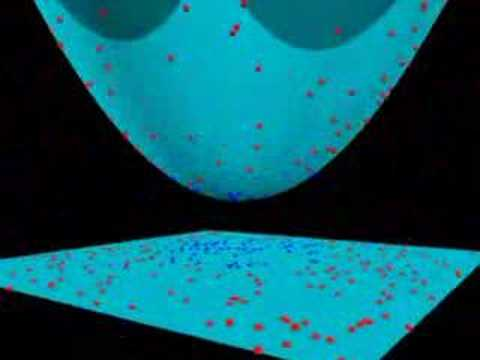

In [21]:
YouTubeVideo('3liCbRZPrZA', width=640, height=480)

In [22]:
interact(lin_sep_svm_demo_kernel_C, class_sep=FloatSlider(min=0.2, max=4, value=2, step=0.2), kernel=['rbf', 'linear', 'poly'],         coef0=FloatSlider(min=0, max=10, step=0.2, value=0),         C=FloatSlider(min=0.002, max=10, step=0.002, value=1),         degree=FloatSlider(min=2, max=3, step=1, value=2),         gamma=FloatSlider(min=0.01, max=5, step=0.01, value=0.5),)

interactive(children=(FloatSlider(value=2.0, description='class_sep', max=4.0, min=0.2, step=0.2), Dropdown(de…

<function __main__.lin_sep_svm_demo_kernel_C>

# SVM for regression!


<center><img src='img/regression.png' width=500></center>

# SVM for regression!

$\xi_i \geq 0$, $\hat \xi_i \geq 0$ - slacks:
$$
y_i \leq g(x_i) + \epsilon + \xi_i
$$
$$
y_i \geq g(x_i) - \epsilon - \hat \xi_i
$$


Optimization task

$$
\begin{cases} 
   C \sum_{i=1}^n (\hat \xi_i + \xi_i) + \frac{1}{2}\|w\|^2 \rightarrow \min\limits_{w, w_0} \\
   g(x_i) - y_i \leq \epsilon + \xi_i \\
   y_i - g(x_i) \leq \epsilon + \hat{\xi}_i \\
   \xi_i \geq 0, \hat \xi_i \geq 0
\end{cases}
$$


Some SVM tutorials and materials:
* [lagrangian duality in 10 mins](https://davidrosenberg.github.io/mlcourse/Archive/2018/Lectures/04d.lagrangian-duality-in-ten-minutes.pdf)
* [tutorial 1](https://www.svm-tutorial.com/)
* [tutorial 2](http://web.mit.edu/zoya/www/SVM.pdf)
* [tutorial 3](http://www.ccas.ru/voron/download/SVM.pdf)